In [1]:
import random
import operator
import datetime
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/home/pengtt/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 100个正态分布的悲伤
grief_heights = np.random.normal(50, 6, 100)
grief_weights = np.random.normal(5, 0.5, 100)

# 100个正态分布的痛苦
agony_heights = np.random.normal(30,6,100)
agony_weights = np.random.normal(4,0.5,100)

# 100个正态分布的绝望
despair_heights = np.random.normal(45,6,100)
despair_weights = np.random.normal(2.5, 0.5, 100)

In [3]:
# 设置图片大小
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10

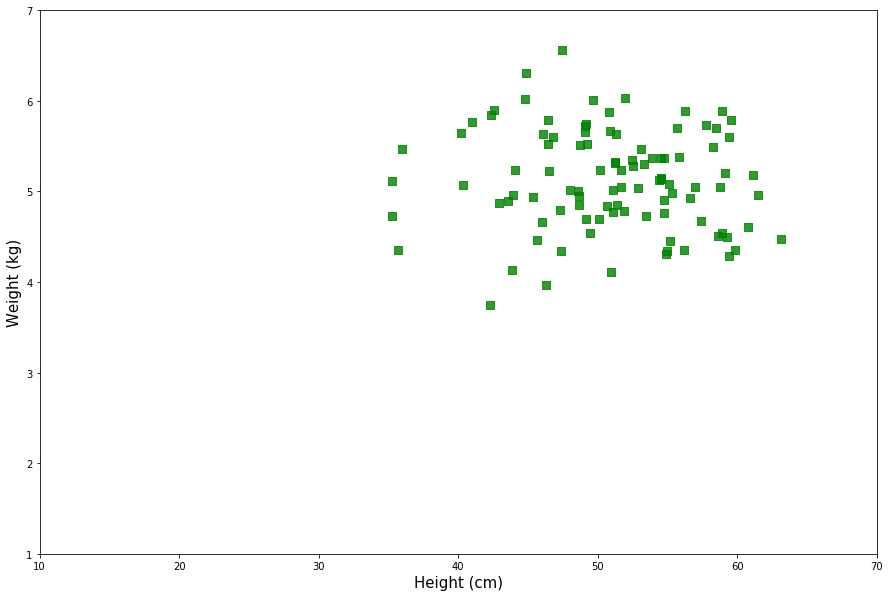

In [4]:
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8)
plt.axis((10, 70,1,7))
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

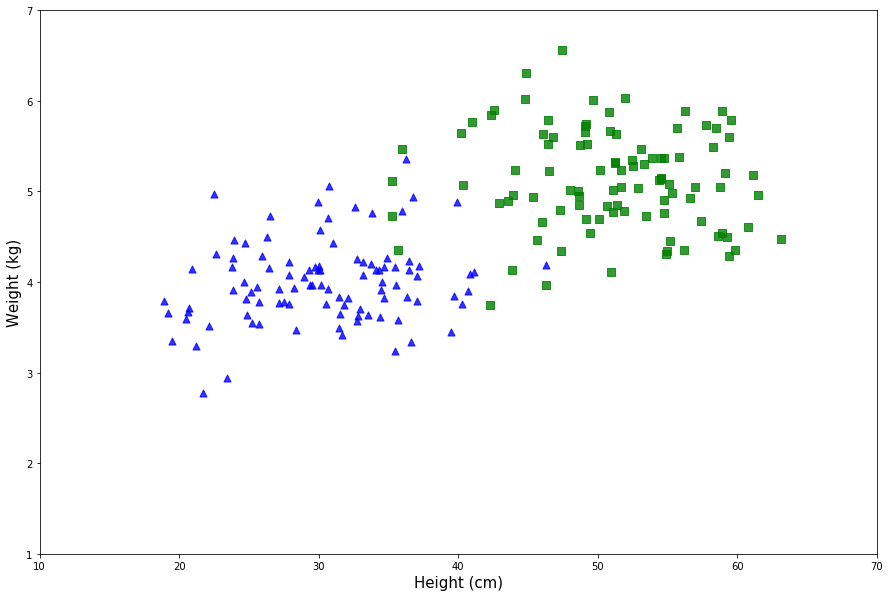

In [5]:
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8)
plt.axis((10, 70,1,7))
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

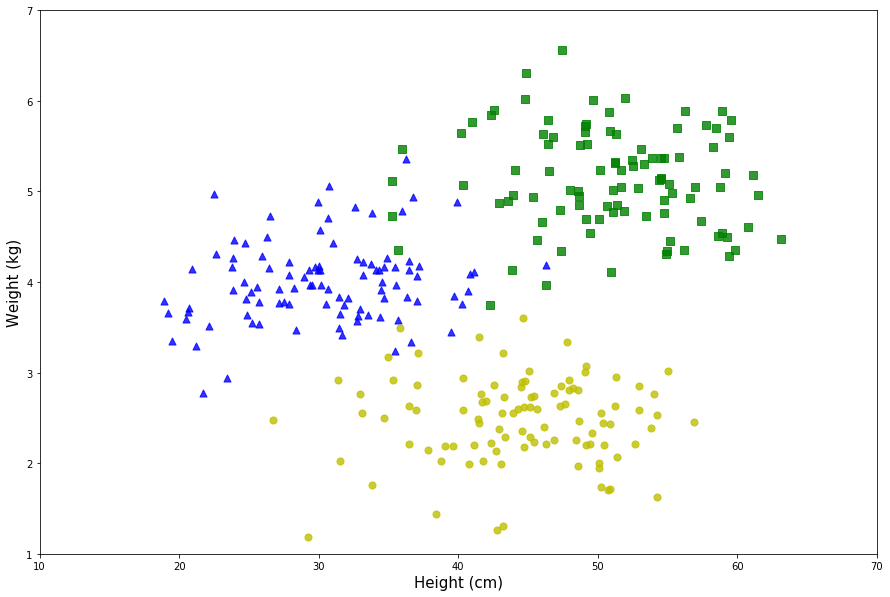

In [6]:
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8)
plt.axis((10, 70,1,7))
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

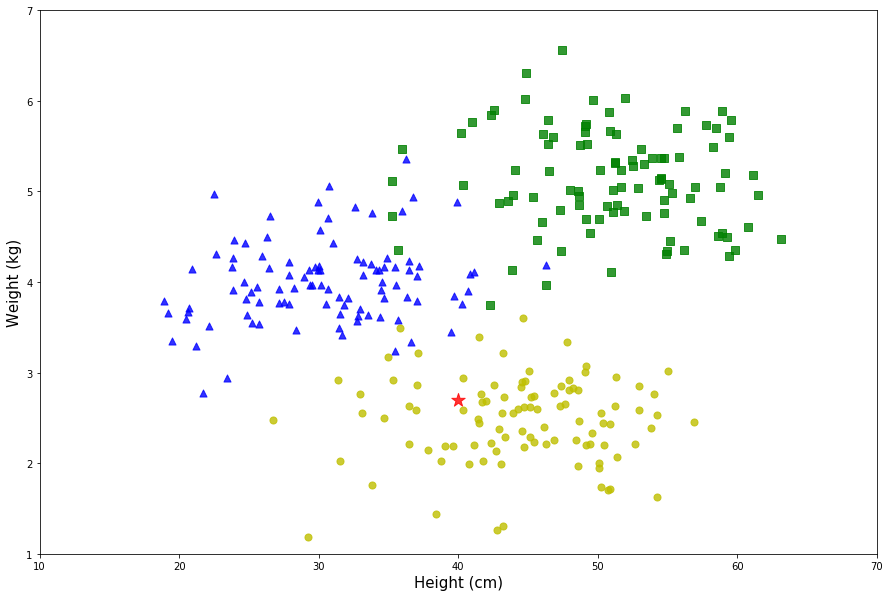

In [7]:
plt.scatter(40,2.7, c='r', s=200, marker='*',alpha=0.8)
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8)
plt.axis((10, 70,1,7))
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

In [8]:
class kdtree(object):
    
    # 创建 kdtree 喵
    # point_list 是一个 list 的 pair，pair[0] 是一 tuple 的特征，pair[1] 是类别
    def __init__(self, point_list, depth=0, root=None):
        
        if len(point_list)>0:
            
            # 轮换按照树深度选择坐标轴
            k = len(point_list[0][0])
            axis = depth % k
            
            # 选中位线，切
            point_list.sort(key=lambda x:x[0][axis])
            median = len(point_list) // 2
            
            self.axis = axis
            self.root = root
            self.size = len(point_list)
            
            # 造节点
            self.node = point_list[median]
            # 递归造左枝和右枝
            if len(point_list[:median])>0:
                self.left = kdtree(point_list[:median], depth+1, self)
            else:
                self.left = None
            if len(point_list[median+1:])>0:
                self.right = kdtree(point_list[median+1:], depth+1, self)
            else:
                self.right = None
            # 记录是按哪个方向切的还有树根

        else:
            return None
    
    # 在树上加一点
    def insert(self, point):
        self.size += 1
        
        # 分析是左还是右，递归加在叶子上
        if point[0][self.axis]<self.node[0][self.axis]:
            if self.left!=None:
                self.left.insert(point)
            else:
                self.left = kdtree([point], self.axis+1, self)
        else:
            if self.right!=None:
                self.right.insert(point)
            else:
                self.right = kdtree([point], self.axis+1, self)
            
            
    # 输入一点
    # 按切分寻找叶子
    def find_leaf(self, point):
        if self.left==None and self.right==None:
            return self
        elif self.left==None:
            return self.right.find_leaf(point)
        elif self.right==None:
            return self.left.find_leaf(point)
        elif point[self.axis]<self.node[0][self.axis]:
            return self.left.find_leaf(point)
        else:
            return self.right.find_leaf(point)
        

    # 查找最近的 k 个点，复杂度 O(DlogN)，D是维度，N是树的大小
    # 输入一点、一距离函数、一k。距离函数默认是 L_2
    def knearest(self, point, k=1, dist=lambda x,y: sum(map(lambda u,v:(u-v)**2,x,y))):
        # 往下戳到最底叶
        leaf = self.find_leaf(point)
        # 从叶子网上爬
        return leaf.k_down_up(point, k, dist, result=[], stop=self, visited=None)


    # 从下往上爬函数，stop是到哪里去，visited是从哪里来
    def k_down_up(self, point,k, dist, result=[],stop=None, visited=None):

        # 选最长距离
        if result==[]:
            max_dist = 0
        else:
            max_dist = max([x[1] for x in result])

        other_result=[]

        # 如果离分界线的距离小于现有最大距离，或者数据点不够，就从另一边的树根开始刨
        if (self.left==visited and self.node[0][self.axis]-point[self.axis]<max_dist and self.right!=None)\
            or (len(result)<k and self.left==visited and self.right!=None):
            other_result=self.right.knearest(point,k, dist)

        if (self.right==visited and point[self.axis]-self.node[0][self.axis]<max_dist and self.left!=None)\
            or (len(result)<k and self.right==visited and self.left!=None):
            other_result=self.left.knearest(point, k, dist)

        # 刨出来的点放一起，选前 k 个
        result.append((self.node, dist(point, self.node[0])))
        result = sorted(result+other_result, key=lambda pair: pair[1])[:k]

        # 到停点就返回结果
        if self==stop:
            return result
        # 没有就带着现有结果接着往上爬
        else:
            return self.root.k_down_up(point,k,  dist, result, stop, self)

    # 输入 特征、类别、k、距离函数
    # 返回这个点属于该类别的概率
    def kNN_prob(self, point, label, k, dist=lambda x,y: sum(map(lambda u,v:(u-v)**2,x,y))):
        nearests = self.knearest(point,  k, dist)
        return float(len([pair for pair in nearests if pair[0][1]==label]))/float(len(nearests))


    # 输入 特征、k、距离函数
    # 返回该点概率最大的类别以及相对应的概率
    def kNN(self, point, k, dist=lambda x,y: sum(map(lambda u,v:(u-v)**2,x,y))):
        nearests = self.knearest(point, k , dist)

        statistics = {}
        for data in nearests:
            label = data[0][1]
            if label not in statistics: 
                statistics[label] = 1
            else:
                statistics[label] += 1

        max_label = max(statistics.items(), key=operator.itemgetter(1))[0]
        return max_label, float(statistics[max_label])/float(len(nearests))

In [9]:
# 设置样本集
grieves = map(lambda x,y:tuple(((x,y),'g')),grief_heights, grief_weights)
agonies = map(lambda u,v:tuple(((u,v),'b')),agony_heights, agony_weights)
despairs = map(lambda a,b:tuple(((a,b),'y')),despair_heights, despair_weights)
grieves = list(grieves)
agonies = list(agonies)
despairs = list(despairs)
# 创建kd树
tree = kdtree(list(np.concatenate((grieves,agonies,despairs))))

In [10]:
# 穷举生成空间上的点
all_points = []
for i in range(100,701):
    for j in range(100,701):
        all_points.append((float(i)/10., float(j)/100.))

In [11]:
# 一共是36万个点
len(all_points)

361201

In [12]:
# 设置归一化距离函数
def normalized_dist(x,y):
    return (x[0]-y[0])**2+(10*x[1]-10*y[1])**2

In [13]:
# 每个点运算 15NN，并记录计算时间
now = datetime.datetime.now()
fifteen_NN_result = []
for point in all_points:
    fifteen_NN_result.append((point, tree.kNN(point,k=15, dist=normalized_dist)[0]))
print(datetime.datetime.now() - now)

0:13:54.092076


In [14]:
# 把每个颜色的数据分开
fifteen_NN_yellow = []
fifteen_NN_green = []
fifteen_NN_blue = []

for pair in fifteen_NN_result:
    if pair[1]=='y':
        fifteen_NN_yellow.append(pair[0])
    if pair[1]=='g':
        fifteen_NN_green.append(pair[0])
    if pair[1]=='b':
        fifteen_NN_blue.append(pair[0])

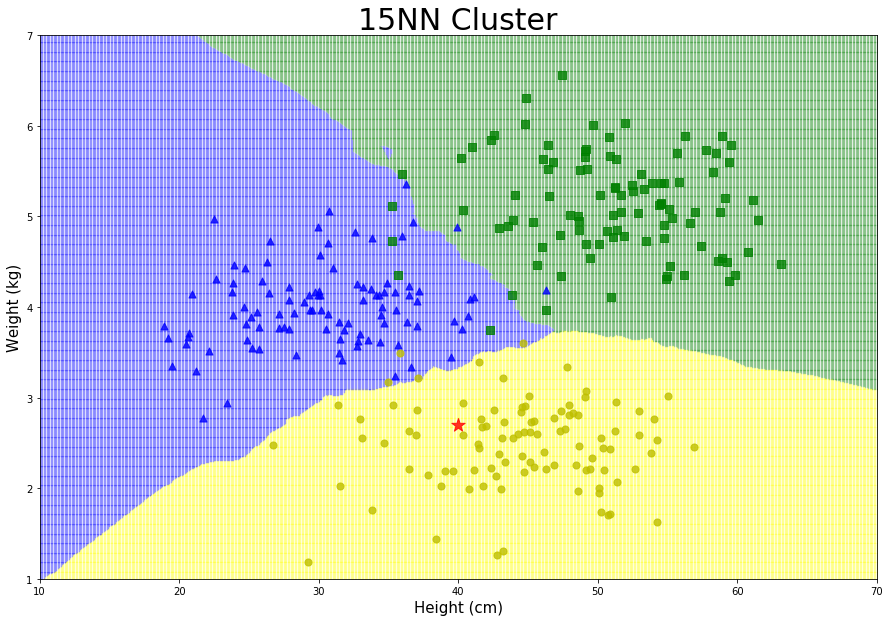

In [16]:
plt.scatter(40,2.7, c='r', s=200, marker='*',alpha=0.8, zorder=10)
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8,zorder=10)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8,zorder=10)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8,zorder=10)
plt.scatter([x[0] for x in fifteen_NN_yellow], [x[1] for x in fifteen_NN_yellow], s=1, c='yellow', marker='1', alpha=0.3)
plt.scatter([x[0] for x in fifteen_NN_blue], [x[1] for x in fifteen_NN_blue], s=1, c='blue', marker='2', alpha=0.3)
plt.scatter([x[0] for x in fifteen_NN_green], [x[1] for x in fifteen_NN_green], s=1, c='green', marker='3', alpha=0.3)
plt.axis((10, 70,1,7))
plt.title('15NN Cluster',size=30)
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

In [18]:
# 每个点运算 1NN，并记录计算时间
now = datetime.datetime.now()
one_NN_result = []
for point in all_points:
    one_NN_result.append((point, tree.kNN(point,k=1, dist=lambda x,y: (x[0]-y[0])**2+(10*x[1]-10*y[1])**2)[0]))
print(datetime.datetime.now() - now)

0:07:37.817931


In [19]:
# 把每个颜色的数据分开
one_NN_yellow = []
one_NN_green = []
one_NN_blue = []

for pair in one_NN_result:
    if pair[1]=='y':
        one_NN_yellow.append(pair[0])
    if pair[1]=='g':
        one_NN_green.append(pair[0])
    if pair[1]=='b':
        one_NN_blue.append(pair[0])

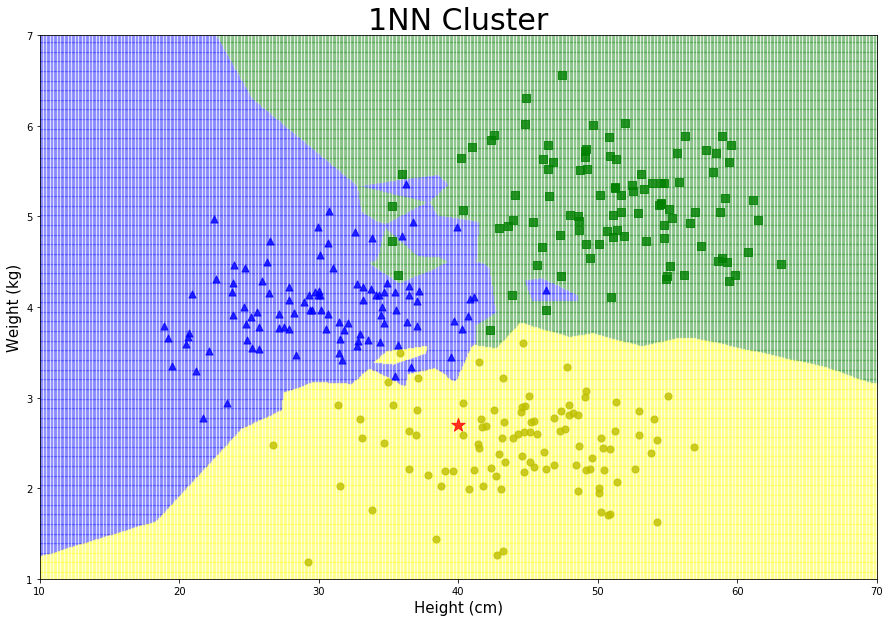

In [21]:
plt.scatter(40,2.7, c='r', s=200, marker='*',alpha=0.8, zorder=10)
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8,zorder=10)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8,zorder=10)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8,zorder=10)
plt.scatter([x[0] for x in one_NN_yellow], [x[1] for x in one_NN_yellow], s=1, c='yellow', marker='1', alpha=0.3)
plt.scatter([x[0] for x in one_NN_blue], [x[1] for x in one_NN_blue], s=1, c='blue', marker='2', alpha=0.3)
plt.scatter([x[0] for x in one_NN_green], [x[1] for x in one_NN_green], s=1, c='green', marker='3', alpha=0.3)
plt.axis((10, 70,1,7))
plt.title('1NN Cluster',size=30)
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

In [23]:
# 15NN 计算是悲伤的概率
now = datetime.datetime.now()
grief_prob = []
for point in all_points:
    grief_prob.append((point, tree.kNN_prob(point, label='g', k=15, dist=normalized_dist)))
print(datetime.datetime.now() - now)

0:13:20.966357


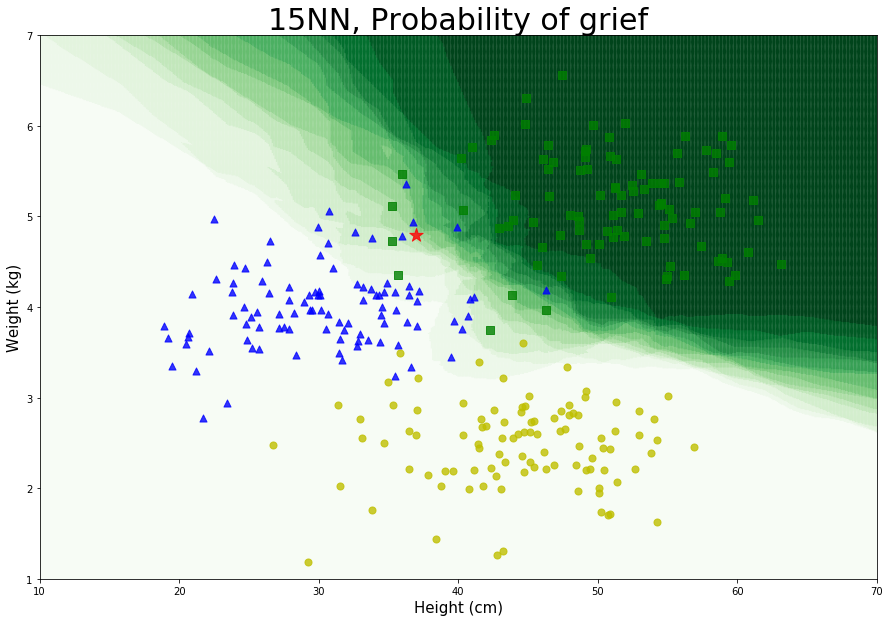

In [25]:
plt.scatter(37,4.8, c='r', s=200, marker='*',alpha=0.8,zorder=10)
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8,zorder=10)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8,zorder=10)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8,zorder=10)
plt.scatter([x[0][0] for x in grief_prob], [x[0][1] for x in grief_prob], s=1, c=[x[1] for x in grief_prob], marker='1',cmap='Greens')
plt.axis((10, 70,1,7))
plt.title('15NN, Probability of grief',size=30)
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

In [27]:
# 15NN 计算是痛苦的概率
now = datetime.datetime.now()
agony_prob = []
for point in all_points:
    agony_prob.append((point, tree.kNN_prob(point, label='b', k=15, dist=normalized_dist)))
print(datetime.datetime.now() - now)

0:13:19.900276


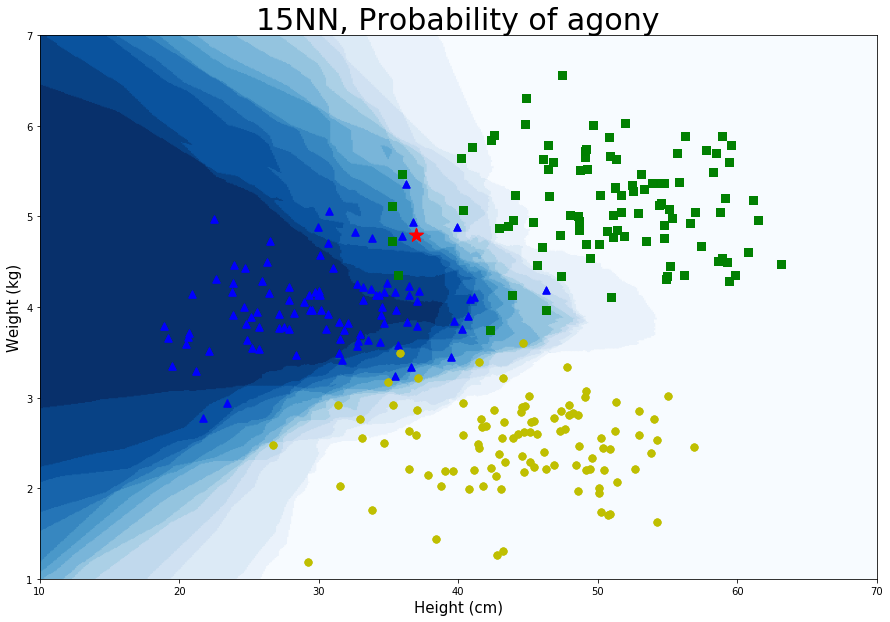

In [30]:
plt.scatter(37,4.8, c='r', s=200, marker='*',alpha=0.8,zorder=10)
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8,zorder=10)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8,zorder=10)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8,zorder=10)
plt.scatter([x[0][0] for x in agony_prob], [x[0][1] for x in agony_prob], s=1, c=[x[1] for x in agony_prob], marker='1',cmap='Blues')
plt.axis((10, 70,1,7))
plt.title('15NN, Probability of agony',size=30)
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()

In [32]:

# 15NN 计算是绝望的概率
now = datetime.datetime.now()
despair_prob = []
for point in all_points:
    despair_prob.append((point, tree.kNN_prob(point, label='y', k=15, dist=normalized_dist)))
print(datetime.datetime.now() - now)

0:13:17.942107


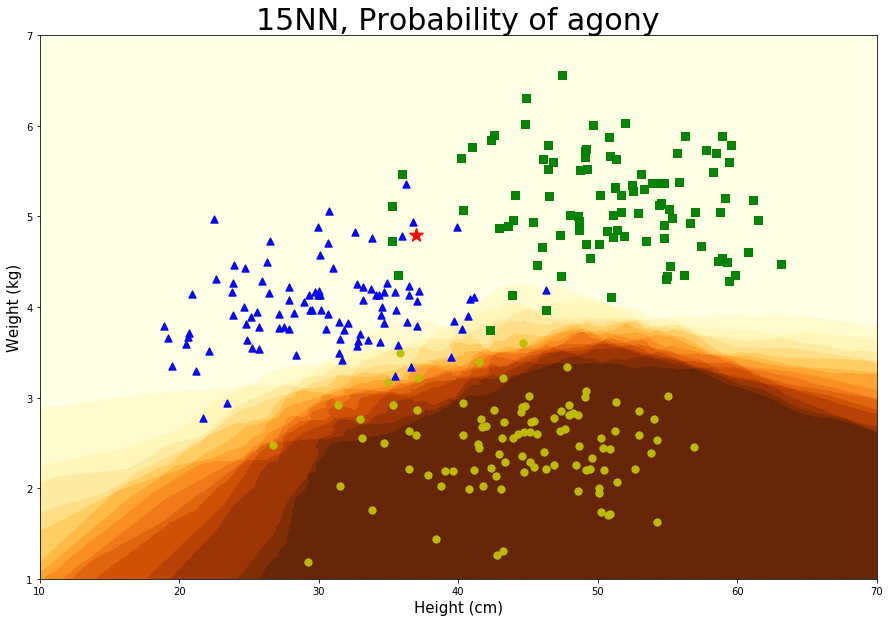

In [34]:
plt.scatter(37,4.8, c='r', s=200, marker='*',alpha=0.8,zorder=10)
plt.scatter(grief_heights,grief_weights,c='g',marker='s',s=50,alpha=0.8,zorder=10)
plt.scatter(agony_heights,agony_weights,c='b',marker='^',s=50,alpha=0.8,zorder=10)
plt.scatter(despair_heights,despair_weights, c='y', s=50, alpha=0.8,zorder=10)
plt.scatter([x[0][0] for x in despair_prob], [x[0][1] for x in despair_prob], s=1, c=[x[1] for x in despair_prob], marker='1',cmap='YlOrBr')
plt.axis((10, 70,1,7))
plt.title('15NN, Probability of agony',size=30)
plt.xlabel('Height (cm)',size=15)
plt.ylabel('Weight (kg)', size=15)
plt.show()